In [116]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
fd = FundamentalData.

In [578]:
AlphaVantage_API_key = ''

ts = TimeSeries(key='ba', output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='spy', outputsize='full')


In [ ]:
data, meta_data = ts.get

In [20]:
goog = pd.read_csv('/Users/anthonyesposito/Desktop/python_practice/Daily_Stock_Prices/data/GOOG/GOOGrawDat.csv')

In [21]:
goog.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2014-03-27,568.000,568.00,552.92,558.46,13100.0
1,2014-03-28,561.200,566.43,558.67,559.99,41100.0
2,2014-03-31,566.890,567.00,556.93,556.97,10800.0
3,2014-04-01,558.710,568.45,558.71,567.16,7900.0
4,2014-04-02,565.106,604.83,562.19,567.00,146700.0


In [22]:
goog['date'].dtype

dtype('O')

In [23]:
goog['date']  = pd.to_datetime(goog['date'], yearfirst=True)

In [24]:
goog['date'].dtype

dtype('<M8[ns]')

In [25]:
goog.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2014-03-27,568.000,568.00,552.92,558.46,13100.0
1,2014-03-28,561.200,566.43,558.67,559.99,41100.0
2,2014-03-31,566.890,567.00,556.93,556.97,10800.0
3,2014-04-01,558.710,568.45,558.71,567.16,7900.0
4,2014-04-02,565.106,604.83,562.19,567.00,146700.0


In [26]:
goog = goog.set_index('date')

In [27]:
goog.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0


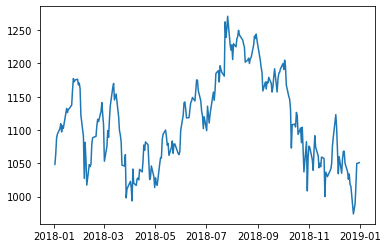

In [28]:
plt.plot(goog.loc['2018','1. open'])

In [29]:
a = goog.rolling(2).mean()

In [30]:
b = a.diff(1)

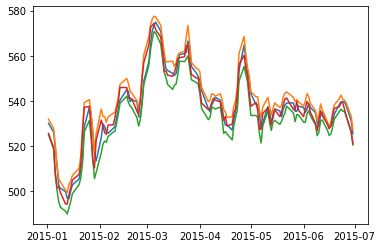

In [31]:
plt.plot(a.loc['2015-1':'2015-6', '1. open':'4. close'])

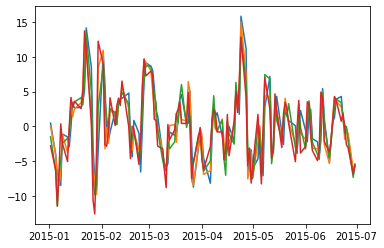

In [38]:
plt.plot(b.loc['2015-1':'2015-6', '1. open':'4. close'])


In [7]:
print(data.head(), '\n\n', data.tail())

            1. open   2. high   3. low  4. close  5. volume
date                                                       
2021-02-26   122.93  123.5094  120.645    122.07  1902721.0
2021-02-25   124.81  125.2500  121.930    122.10  1425040.0
2021-02-24   122.26  125.4100  122.010    125.02  1898362.0
2021-02-23   123.51  123.5100  120.410    122.42  2125365.0
2021-02-22   125.95  126.1600  123.090    123.50  1335940.0 

             1. open  2. high  3. low  4. close   5. volume
date                                                      
1999-11-24    40.13    41.94   40.00     41.06   3464400.0
1999-11-23    42.50    43.63   40.25     40.25   4274400.0
1999-11-22    41.31    44.00   40.06     44.00   4705200.0
1999-11-19    42.94    43.00   39.81     40.38  10897100.0
1999-11-18    45.50    50.00   40.00     44.00  44739900.0


In [8]:
print(meta_data)

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'A', '3. Last Refreshed': '2021-02-26', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}


In [ ]:
def stockFFT(data, RollTS, RollFS, winMin, winMax, T0, T1):
    from scipy.fft import fft, fftfreq
    from datetime import date, timedelta

    from scipy.fft import fft, fftfreq

    data.index  = pd.to_datetime(data.index, yearfirst=True)

    data = data.sort_index()
    a = data.rolling(RollTS).mean()
    b = a.diff(1)
    b = b.loc[ T0:T1 , :]
    N = b['1. open'].dropna().shape[0]
    y = b['1. open'].dropna().values
    yf = fft(y)
    xf = fftfreq(N, 1/N)

    yfreal = yf.real
    yfimag = yf.imag
    yfmag = ( yfreal**2 + yfimag**2 ) ** .5

    yf = np.array([ yfreal, yfimag, yfmag]).T

    datafft = pd.DataFrame(yf, index=xf, columns=['Real', 'Imag', 'Prod'])
    datafft = datafft.sort_index()

    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
    ax1.plot(datafft.rolling(RollFS, center=True).mean().loc[max(0, winMin):min(datafft.index.max(), winMax)]);

In [587]:
def retrieveTS(sym):
    ts = TimeSeries(key='ba', output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    data.index = pd.to_datetime(data.index)
    data = data.sort_index()
    return data, meta_data

In [586]:
def stockFFTdata(data, RollTS, RollFS, winMin, winMax, T0, T1):
    from scipy.fft import fft, fftfreq
    from datetime import date, timedelta

    from scipy.fft import fft, fftfreq

    data.index  = pd.to_datetime(data.index, yearfirst=True)

    data = data.sort_index()
    a = data.rolling(RollTS).mean()
    b = a.diff(1)
    b = b.loc[ T0:T1 , :]
    N = b['1. open'].dropna().shape[0]
    y = b['1. open'].dropna().values
    yf = fft(y)
    xf = fftfreq(N, 1/N)

    yfreal = yf.real
    yfimag = yf.imag
    yfmag = ( yfreal**2 + yfimag**2 ) ** .5

    yf = np.array([ yfreal, yfimag, yfmag]).T

    datafft = pd.DataFrame(yf, index=xf, columns=['Real', 'Imag', 'Prod'])
    datafft = datafft.sort_index()
    datafft = datafft.loc[winMin:winMax]
    
    return datafft

[124.32       106.66792091 119.01657032 ...  87.29523985 119.01657032
 106.66792091]


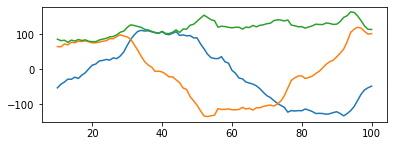

In [400]:
from datetime import date, timedelta

RollTS = 1
RollFS = 5
winMin = 10
winMax = 100
year = 365.25
T0 = date(2000, 2, 10)
dT = timedelta(days=(3 * year))
T1 = T0 + dT
T1 = date(2020, 2, 1)

from scipy.fft import fft, fftfreq

data.index  = pd.to_datetime(data.index, yearfirst=True)

data = data.sort_index()
a = data.rolling(RollTS).mean()
b = a.diff(1)
b = b.loc[ T0:T1 , :]
N = b['1. open'].dropna().shape[0]
y = b['1. open'].dropna().values
yf = fft(y)
xf = fftfreq(N, 1/N)

yfreal = yf.real
yfimag = yf.imag
yfmag = ( yfreal**2 + yfimag**2 ) ** .5
print(yfmag)

yf = np.array([ yfreal, yfimag, yfmag]).T

datafft = pd.DataFrame(yf, index=xf, columns=['Real', 'Imag', 'Prod'])
datafft = datafft.sort_index()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
ax1.plot(datafft.rolling(RollFS, center=True).mean().loc[max(0, winMin):min(datafft.index.max(), winMax)]);

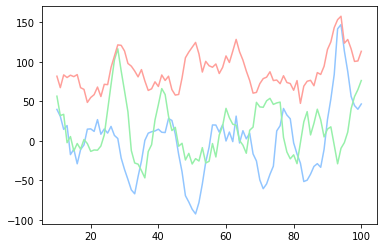

In [480]:
stockFFT(data, RollTS=1, RollFS=5, winMin=10, winMax=100, T0=date(2000, 1, 1), T1=date(2020, 2, 10))

[195.4175     132.92603183  50.41913073 ... 169.95179586  50.41913073
 132.92603183]


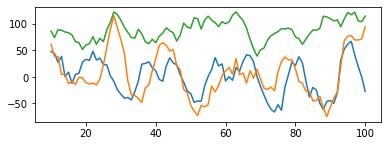

In [427]:
stockFFT(data, RollTS=1, RollFS=5, winMin=10, winMax=100, T0=date(2000, 2, 1), T1=date(2020, 2, 10))

In [478]:
stockFFT(data, RollTS=1, RollFS=5, winMin=10, winMax=100, T0=date(2000, 3, 1), T1=date(2020, 2, 10))

TypeError: 'list' object is not callable

<Figure size 432x288 with 0 Axes>

[181.605      127.3683688   61.36835168 ... 164.56978592  61.36835168
 127.3683688 ]


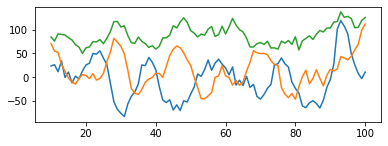

In [429]:
stockFFT(data, RollTS=1, RollFS=5, winMin=10, winMax=100, T0=date(2000, 4, 1), T1=date(2020, 2, 10))

In [501]:
datafft = stockFFTdata(data, RollTS=1, RollFS=5, winMin=10, winMax=100, T0=date(2000, 5, 1), T1=date(2020, 2, 10))

In [503]:
print(type(datafft.index))

<class 'pandas.core.indexes.numeric.Float64Index'>


In [505]:
datafft

,Real,Imag,Prod
10.0,-28.325925,95.258999,99.381260
11.0,78.498668,65.610850,102.307500
12.0,-1.363204,97.786494,97.795995
13.0,74.165116,40.566407,84.534595
14.0,-74.656763,-18.434500,76.899045
...,...,...,...
96.0,94.094651,134.756694,164.356838
97.0,34.139839,21.076783,40.121807
98.0,-46.862723,-50.994812,69.257387
99.0,39.293561,48.187056,62.176976


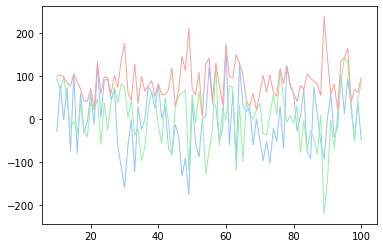

In [514]:
fig = plt.figure()
ax = plt.axes()
line = ax.plot( datafft, lw=1)

[188.6675     126.63464986  52.49504429 ... 161.01275097  52.49504429
 126.63464986]


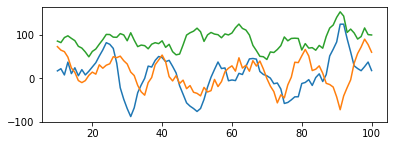

In [434]:

stockFFT(data, RollTS=1, RollFS=5, winMin=10, winMax=100, T0=date(2000, 6, 1), T1=date(2020, 2, 10))

In [476]:
stockFFT(data, RollTS=1, RollFS=5, winMin=10, winMax=100, T0=date(2000, 7, 1), T1=date(2020, 2, 10))

TypeError: 'list' object is not callable

<Figure size 432x288 with 0 Axes>

<Figure size 640x480 with 0 Axes>

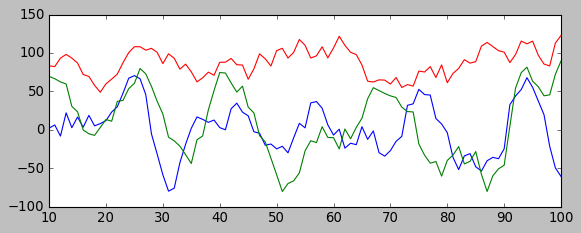

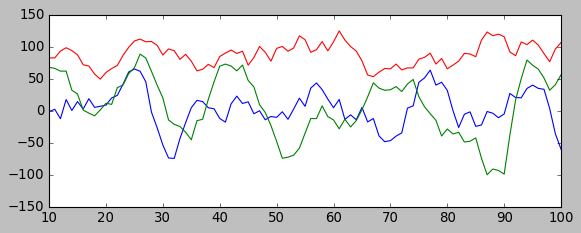

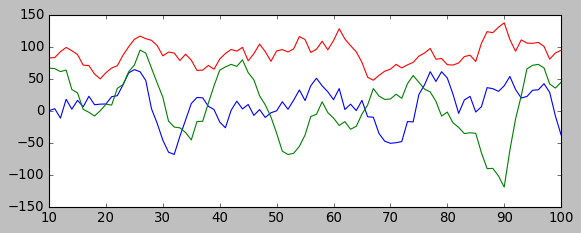

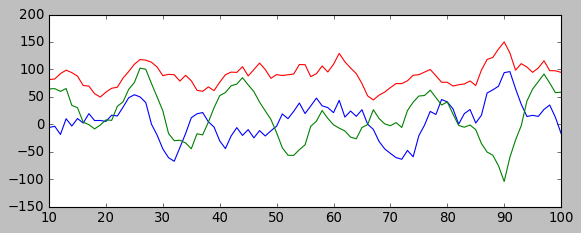

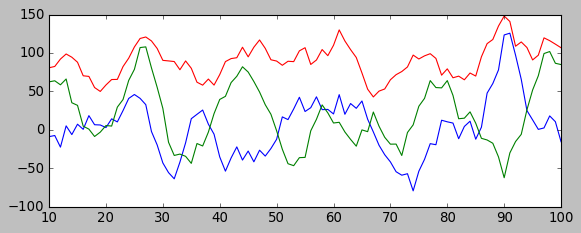

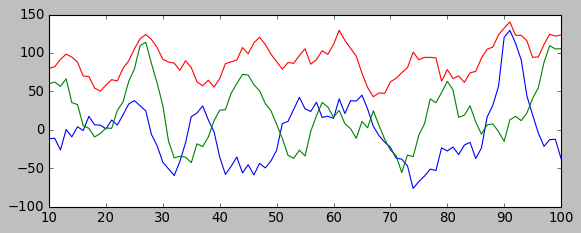

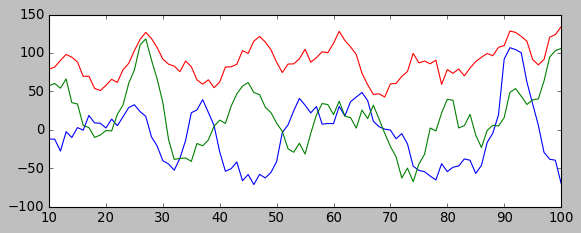

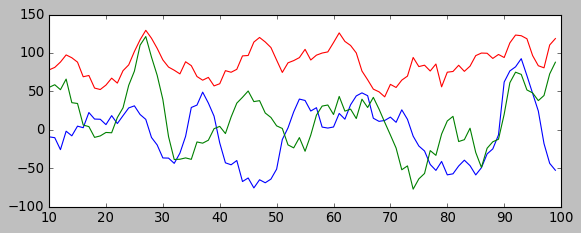

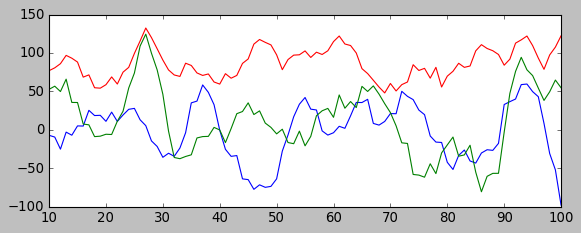

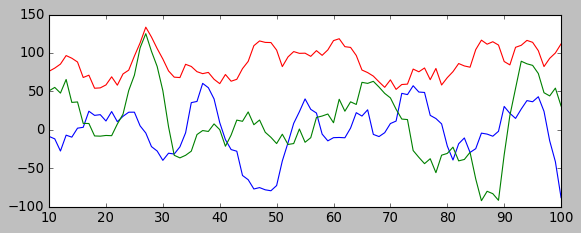

In [593]:
import time

T=date(2000, 7, 1)
fig = plt.figure()
for i in range(10):
    T = T + timedelta(days=10)
    stockFFT(spy, RollTS=1, RollFS=5, winMin=10, winMax=100, T0=T, T1=date(2020, 2, 10))

In [556]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('classic')

MovieWriter Pillow unavailable; using Pillow instead.


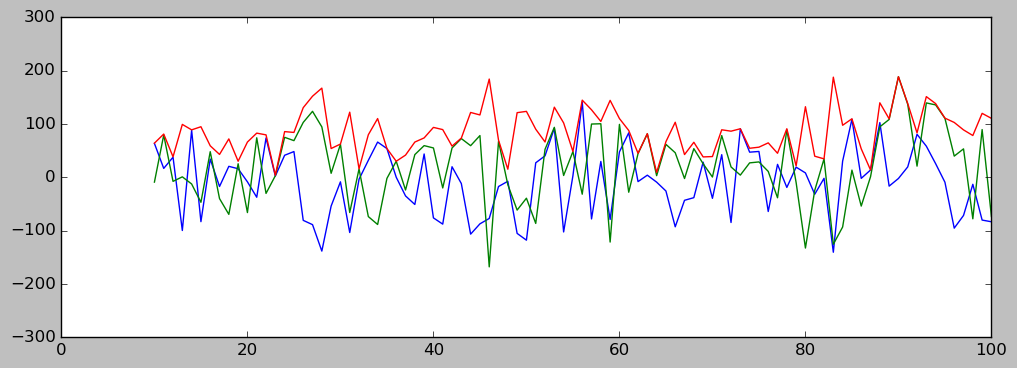

In [594]:
my_dpi = 100
fig = plt.figure(figsize=(1200/my_dpi, 400/my_dpi), dpi=my_dpi)
ax = plt.axes(xlim = (0,100), ylim=(-300, 300))
line1, = ax.plot([], [], lw=1)
line2, = ax.plot([], [], lw=1)
line3, = ax.plot([], [], lw=1)

def init():
    line.set_data( [], [])
    return line,
def animate(i):
    y = stockFFTdata(spy, RollTS=1, RollFS=20, winMin=10, winMax=100, T0=(date(2000, 4, 1) + timedelta(days=i)), T1=date(2020, 2, 10))
    line1.set_data( y.index.values, y.iloc[:, 0].values)
    line2.set_data( y.index.values, y.iloc[:, 1].values)
    line3.set_data( y.index.values, y.iloc[:, 2].values)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)
anim.save('sine_wave.gif', writer='Pillow')

MovieWriter Pillow unavailable; using Pillow instead.


IndexError: list index out of range

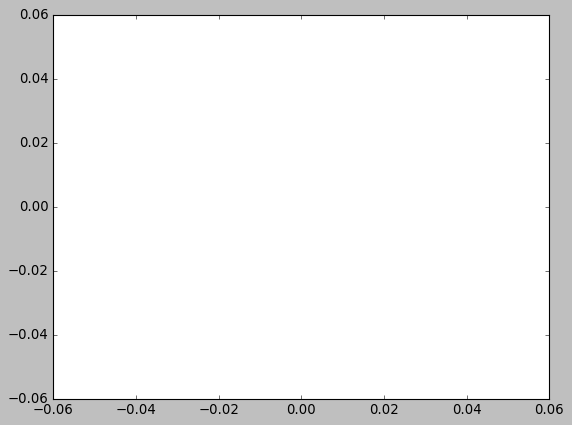

In [553]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes()
line, = ax.plot([], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='Pillow')

In [588]:
goog, goog_meta = retrieveTS('GOOG')

In [589]:
spy, spy_meta = retrieveTS('SPY')

In [658]:
dia, dia_meta = retrieveTS('DIA')

In [660]:
qqq, qqq_meta = retrieveTS('QQQ')

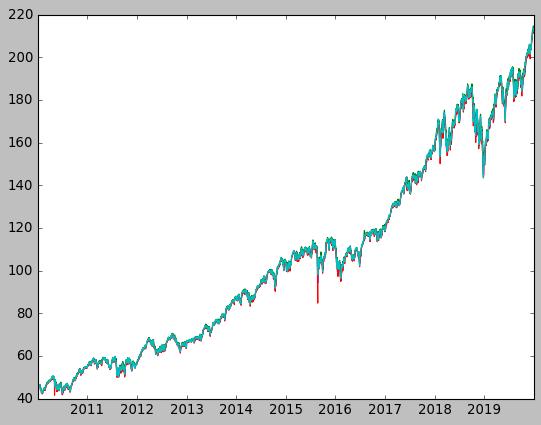

In [662]:
plt.plot(qqq.loc['2010':'2019', '1. open':'4. close'])

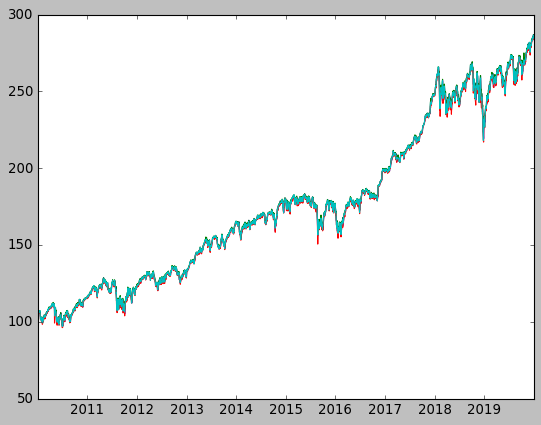

In [659]:
plt.plot(dia.loc['2010':'2019', '1. open':'4. close'])

In [606]:
combinedData = pd.DataFrame([goog['1. open'], spy['1. open']])

In [663]:
combinedData = pd.DataFrame([goog['1. open'], spy['1. open'], dia['1. open'], qqq['1. open']])
combinedData = combinedData.T
combinedData = combinedData.dropna()
combinedDatadiff = combinedData.diff(1, axis=0)
combinedDatadiff = combinedDatadiff/combinedData
combinedDatadiff = combinedDatadiff.dropna()
combinedDatadiff.iloc[:,1]

date
2014-03-28    0.001945
2014-03-31    0.008357
2014-04-01    0.005063
2014-04-02    0.004616
2014-04-03    0.003595
                ...   
2021-02-23   -0.006239
2021-02-24    0.004323
2021-02-25    0.010451
2021-02-26   -0.015767
2021-03-01    0.003216
Name: 1. open, Length: 1743, dtype: float64

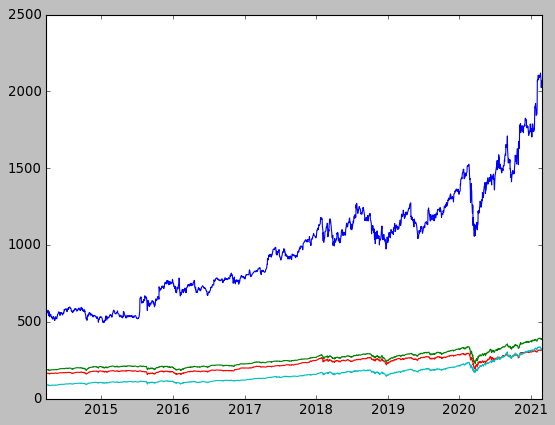

In [664]:
plt.plot(combinedData)

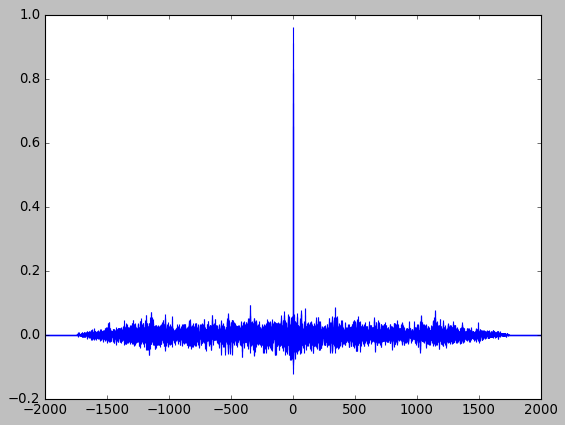

In [673]:
a = plt.xcorr(combinedDatadiff.iloc[:,0], combinedDatadiff.iloc[:,1], maxlags=None);
b = plt.xcorr(combinedDatadiff.iloc[:,0], combinedDatadiff.iloc[:,2], maxlags=None);
c = plt.xcorr(combinedDatadiff.iloc[:,0], combinedDatadiff.iloc[:,3], maxlags=None);
d = plt.xcorr(combinedDatadiff.iloc[:,1], combinedDatadiff.iloc[:,2], maxlags=None);
e = plt.xcorr(combinedDatadiff.iloc[:,1], combinedDatadiff.iloc[:,3], maxlags=None);
d = plt.xcorr(combinedDatadiff.iloc[:,2], combinedDatadiff.iloc[:,3], maxlags=None);

In [688]:
a[0][(a[1].shape[0]//2 - 100):(a[1].shape[0]//2 + 100)]

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   

In [687]:
a[1].shape[0]

3485

In [693]:
def plotcrosscorr(a):
    plt.plot(a[0][(a[1].shape[0]//2 - 100):(a[1].shape[0]//2 + 100)],a[1][(a[1].shape[0]//2 - 100):(a[1].shape[0]//2 + 100)])
    

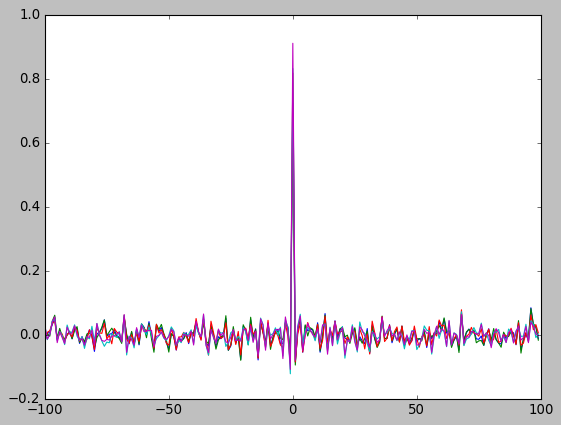

In [700]:
plotcrosscorr(a)
plotcrosscorr(b)
plotcrosscorr(c)
plotcrosscorr(d)
plotcrosscorr(e)

In [727]:
x = np.linspace(0,6*np.pi,1000)
y0 = np.sin(x)
y1 = 2*np.sin(x)
y2 = np.sin(2*x)
y = pd.DataFrame([y0, y1, y2],columns)
for i in y.index:
    plot(y.iloc[i,:])


NameError: name 'columns' is not defined

In [740]:
combinedDataSmooth = combinedData.rolling(25).mean().dropna()

In [741]:
print(combinedDataSmooth)

               1. open   1. open     1. open   1. open
date                                                  
2014-05-01   544.46784  186.4548  163.782800   86.9868
2014-05-02   543.09824  186.5972  163.899200   87.0136
2014-05-05   541.64304  186.6784  163.953600   87.0068
2014-05-06   539.97664  186.7316  163.991200   87.0108
2014-05-07   538.25984  186.7232  163.984800   86.9668
...                ...       ...         ...       ...
2021-02-23  1989.68040  384.9718  310.812208  327.5052
2021-02-24  2001.26360  385.2914  310.985008  327.6848
2021-02-25  2010.70320  385.6634  311.356384  327.7348
2021-02-26  2016.80400  385.6578  311.452784  327.3628
2021-03-01  2023.23760  385.7914  311.597584  327.1220

[1720 rows x 4 columns]


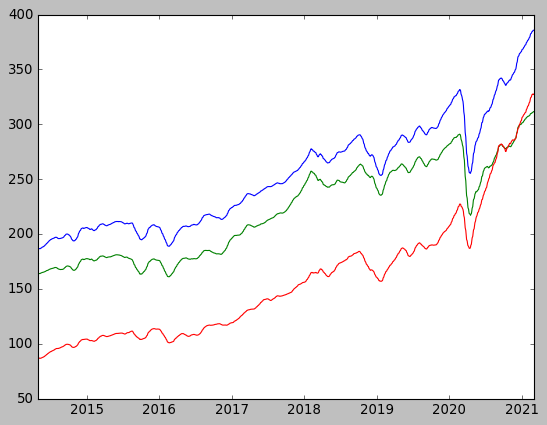

In [742]:
plt.plot(combinedDataSmooth.iloc[:,[1,2,3]])